## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

## Boston 주택 가격 dataset 사용

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [2]:
df_house = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\housing.csv')

df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df_house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df_house = df_house[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
x = df_house.iloc[:, 1:14]
x = add_constant(x)

y = df_house.iloc[:, 0]

model_house = OLS( y, x )

fit_house = model_house.fit()

print( fit_house.summary() )

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        03:47:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

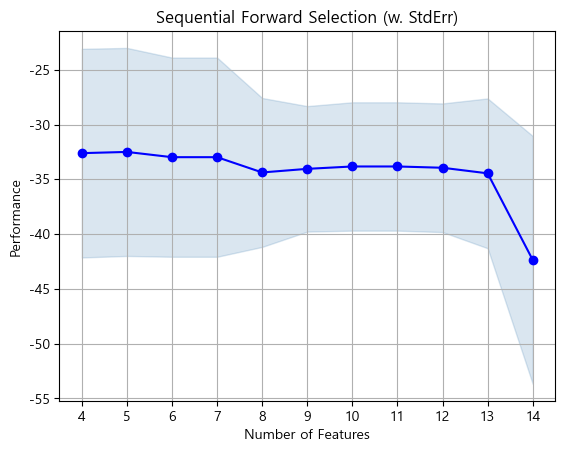

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[-11.682121680475948, -39.04303188956658, -57....",-42.365807,"(const, CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, D...",31.422882,19.602775,11.317667
13,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)","[-16.890716937839738, -47.86867827627796, -42....",-34.457487,"(const, CRIM, ZN, INDUS, CHAS, NOX, AGE, DIS, ...",18.983809,11.842814,6.837452
12,"(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13)","[-17.525787111165624, -41.57280506223744, -43....",-33.94861,"(const, CRIM, ZN, INDUS, NOX, AGE, DIS, RAD, T...",16.3012,10.169301,5.871249
11,"(0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13)","[-17.423922308779392, -41.22343566772415, -43....",-33.831617,"(const, CRIM, ZN, NOX, AGE, DIS, RAD, TAX, PTR...",16.267642,10.148366,5.859162
10,"(1, 2, 5, 7, 8, 9, 10, 11, 12, 13)","[-17.423922308779623, -41.22343566772382, -43....",-33.831617,"(CRIM, ZN, NOX, AGE, DIS, RAD, TAX, PTRATIO, B...",16.267642,10.148366,5.859162
9,"(1, 2, 5, 8, 9, 10, 11, 12, 13)","[-18.016754591639287, -41.09709396273585, -43....",-34.048487,"(CRIM, ZN, NOX, DIS, RAD, TAX, PTRATIO, B, LSTAT)",15.904595,9.921884,5.728403
8,"(1, 2, 8, 9, 10, 11, 12, 13)","[-15.930954274333176, -45.24223305740729, -43....",-34.377067,"(CRIM, ZN, DIS, RAD, TAX, PTRATIO, B, LSTAT)",18.872681,11.773487,6.797426
7,"(0, 5, 6, 8, 11, 12, 13)","[-13.512189074378652, -31.95839552175163, -57....",-32.982787,"(const, NOX, RM, DIS, PTRATIO, B, LSTAT)",25.244344,15.74837,9.092326
6,"(5, 6, 8, 11, 12, 13)","[-13.51218907437917, -31.958395521751786, -57....",-32.982787,"(NOX, RM, DIS, PTRATIO, B, LSTAT)",25.244344,15.74837,9.092326
5,"(2, 6, 11, 12, 13)","[-9.543545552351208, -34.48216564242187, -55.8...",-32.503625,"(ZN, RM, PTRATIO, B, LSTAT)",26.363481,16.44653,9.495409


In [7]:
lr = LinearRegression()

sbfs = SFS( lr, k_features=4,
            forward=False, floating=True,
            scoring='neg_mean_squared_error',
            cv=4, n_jobs=-1)

sbfs.fit(x,y)

fig = plot_sfs(sbfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

In [8]:
x = df_house[['RM', 'PTRATIO', 'B', 'LSTAT']]
x = add_constant(x)

model_house = OLS( y, x )

fit_house = model_house.fit()

print( fit_house.summary() )

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.10e-125
Time:                        03:47:18   Log-Likelihood:                -1545.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0548      4.220      2.857      0.0

# Ridge 회귀

- `sklearn.linear_model.Ridge( alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [9]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 10)
fit_model = model.fit(x,y)

In [10]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features      coeff
0   intercept  27.467885
1        CRIM  -0.101435
2          ZN   0.049579
3       INDUS  -0.042962
4        CHAS   1.952021
5         NOX  -2.371619
6          RM   3.702272
7         AGE  -0.010707
8         DIS  -1.248808
9         RAD   0.279596
10        TAX  -0.013993
11    PTRATIO  -0.797945
12          B   0.010037
13      LSTAT  -0.559366

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 



In [11]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7316
Adj. R-squared : 0.7245

F-statistic : 103.147
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       27.4679            5.192        5.291          0.000
1        CRIM       -0.1014            0.033       -3.034          0.003
2          ZN        0.0496            0.014        3.550          0.000
3       INDUS       -0.0430            0.063       -0.687          0.493
4        CHAS        1.9520            0.877        2.227          0.026
5         NOX       -2.3716            3.886       -0.610          0.542
6          RM        3.7023            0.425        8.708          0.000
7         AGE       -0.0107            0.013       -0.797          0.426
8         DIS       -1.2488            0.203       -6.154          0.000
9         RAD        0.2796            0.067        4.142          0.000
10        TAX       -0.0140            0.004       -3.658          0.000
11    PTRATIO       -0.7979     

## RMSE 가 최소인 조건 탐색

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 50 일 때 5 folds 의 평균 RMSE : 5.373 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 
alpha 150 일 때 5 folds 의 평균 RMSE : 5.328 
alpha 200 일 때 5 folds 의 평균 RMSE : 5.341 
alpha 500 일 때 5 folds 의 평균 RMSE : 5.450 


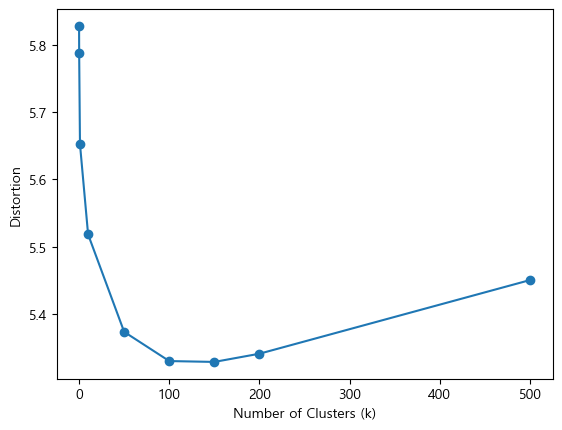

In [12]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 50, 100, 150, 200, 500]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

alpha 100 일 때 5 folds 의 평균 RMSE : 5.32959 
alpha 105 일 때 5 folds 의 평균 RMSE : 5.32834 
alpha 110 일 때 5 folds 의 평균 RMSE : 5.32741 
alpha 115 일 때 5 folds 의 평균 RMSE : 5.32678 
alpha 120 일 때 5 folds 의 평균 RMSE : 5.32641 
alpha 125 일 때 5 folds 의 평균 RMSE : 5.32627 
alpha 130 일 때 5 folds 의 평균 RMSE : 5.32634 
alpha 135 일 때 5 folds 의 평균 RMSE : 5.32659 
alpha 140 일 때 5 folds 의 평균 RMSE : 5.32702 
alpha 145 일 때 5 folds 의 평균 RMSE : 5.32760 


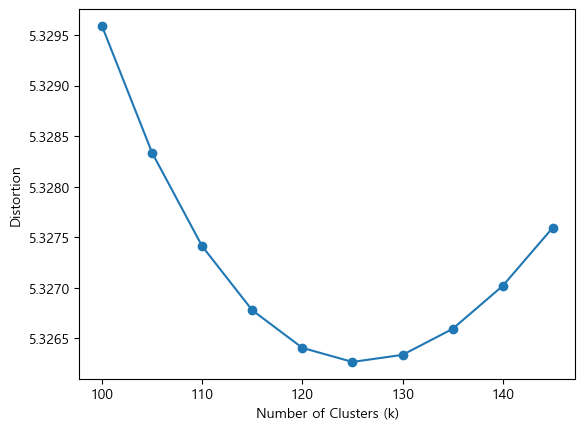

In [13]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = list(range(100, 150, 5))

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [14]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 125)
fit_model = model.fit(x,y)

In [15]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features      coeff
0   intercept  37.746190
1        CRIM  -0.101940
2          ZN   0.054949
3       INDUS  -0.052949
4        CHAS   0.542281
5         NOX  -0.208374
6          RM   2.121150
7         AGE   0.003597
8         DIS  -1.128695
9         RAD   0.319935
10        TAX  -0.016058
11    PTRATIO  -0.831608
12          B   0.009256
13      LSTAT  -0.675654

 5 folds 의 개별 Negative MSE scores:  [-13.067 -27.764 -35.828 -50.769 -21.498]
 5 folds 의 개별 RMSE scores :  [3.615 5.269 5.986 7.125 4.637]
 5 folds 의 평균 RMSE : 5.326 



In [16]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7149
Adj. R-squared : 0.7074

F-statistic : 94.9163
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       37.7462            5.350        7.055          0.000
1        CRIM       -0.1019            0.034       -2.959          0.003
2          ZN        0.0549            0.014        3.818          0.000
3       INDUS       -0.0529            0.064       -0.821          0.412
4        CHAS        0.5423            0.903        0.600          0.549
5         NOX       -0.2084            4.005       -0.052          0.959
6          RM        2.1211            0.438        4.841          0.000
7         AGE        0.0036            0.014        0.260          0.795
8         DIS       -1.1287            0.209       -5.398          0.000
9         RAD        0.3199            0.070        4.600          0.000
10        TAX       -0.0161            0.004       -4.073          0.000
11    PTRATIO       -0.8316     

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [17]:
x = df_house.iloc[:, 1:14].drop(['INDUS', 'CHAS', 'NOX', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 125)
fit_model = model.fit(x,y)

In [18]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

    features      coeff
0  intercept  37.687236
1       CRIM  -0.101450
2         ZN   0.056379
3         RM   2.156898
4        DIS  -1.103880
5        RAD   0.337098
6        TAX  -0.017788
7    PTRATIO  -0.841746
8          B   0.009469
9      LSTAT  -0.679259

 5 folds 의 개별 Negative MSE scores:  [-13.246 -27.636 -35.863 -49.689 -21.751]
 5 folds 의 개별 RMSE scores :  [3.639 5.257 5.989 7.049 4.664]
 5 folds 의 평균 RMSE : 5.320 



In [19]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7127
Adj. R-squared : 0.7075

F-statistic : 136.7148
p-value (of F-stat.) 0.0

     Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0  Intercept       37.6872            4.427        8.512          0.000
1       CRIM       -0.1015            0.034       -2.960          0.003
2         ZN        0.0564            0.014        3.992          0.000
3         RM        2.1569            0.426        5.069          0.000
4        DIS       -1.1039            0.170       -6.488          0.000
5        RAD        0.3371            0.066        5.088          0.000
6        TAX       -0.0178            0.003       -5.182          0.000
7    PTRATIO       -0.8417            0.129       -6.546          0.000
8          B        0.0095            0.003        3.384          0.001
9      LSTAT       -0.6793            0.049      -13.941          0.000



# Lasso 회귀

In [20]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 10)
fit_model = model.fit(x,y)

In [21]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features      coeff
0   intercept  30.488359
1        CRIM  -0.000000
2          ZN   0.026146
3       INDUS  -0.000000
4        CHAS   0.000000
5         NOX   0.000000
6          RM   0.000000
7         AGE   0.000000
8         DIS  -0.000000
9         RAD   0.000000
10        TAX  -0.009282
11    PTRATIO  -0.000000
12          B   0.007496
13      LSTAT  -0.564038

 5 folds 의 개별 Negative MSE scores:  [-27.786 -46.397 -80.323 -61.56  -16.302]
 5 folds 의 개별 RMSE scores :  [5.271 6.812 8.962 7.846 4.038]
 5 folds 의 평균 RMSE : 6.586 



In [22]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.5234
Adj. R-squared : 0.5108

F-statistic : 41.5563
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       30.4884            6.918        4.407          0.000
1        CRIM       -0.0000            0.045       -0.000          1.000
2          ZN        0.0261            0.019        1.405          0.161
3       INDUS       -0.0000            0.083       -0.000          1.000
4        CHAS        0.0000            1.168        0.000          1.000
5         NOX        0.0000            5.178        0.000          1.000
6          RM        0.0000            0.567        0.000          1.000
7         AGE        0.0000            0.018        0.000          1.000
8         DIS       -0.0000            0.270       -0.000          1.000
9         RAD        0.0000            0.090        0.000          1.000
10        TAX       -0.0093            0.005       -1.821          0.069
11    PTRATIO       -0.0000     

## RMSE 가 최소인 조건 탐색

alpha 0.0 일 때 5 folds 의 평균 RMSE : 5.82866 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 5.74041 
alpha 0.02 일 때 5 folds 의 평균 RMSE : 5.67874 
alpha 0.03 일 때 5 folds 의 평균 RMSE : 5.64407 
alpha 0.04 일 때 5 folds 의 평균 RMSE : 5.63745 
alpha 0.05 일 때 5 folds 의 평균 RMSE : 5.62759 
alpha 0.06 일 때 5 folds 의 평균 RMSE : 5.61830 
alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.61228 
alpha 0.08 일 때 5 folds 의 평균 RMSE : 5.61217 
alpha 0.09 일 때 5 folds 의 평균 RMSE : 5.61320 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.61512 
alpha 0.11 일 때 5 folds 의 평균 RMSE : 5.61788 
alpha 0.12 일 때 5 folds 의 평균 RMSE : 5.62154 
alpha 0.13 일 때 5 folds 의 평균 RMSE : 5.62606 
alpha 0.14 일 때 5 folds 의 평균 RMSE : 5.62832 
alpha 0.15 일 때 5 folds 의 평균 RMSE : 5.62738 
alpha 0.16 일 때 5 folds 의 평균 RMSE : 5.62577 
alpha 0.17 일 때 5 folds 의 평균 RMSE : 5.62439 
alpha 0.18 일 때 5 folds 의 평균 RMSE : 5.62334 
alpha 0.19 일 때 5 folds 의 평균 RMSE : 5.62265 
alpha 0.2 일 때 5 folds 의 평균 RMSE : 5.62207 
alpha 0.21 일 때 5 folds 의 평균 RMSE : 5.62189 
alpha 0.22 일 때 5 folds 의 평균 RMSE : 

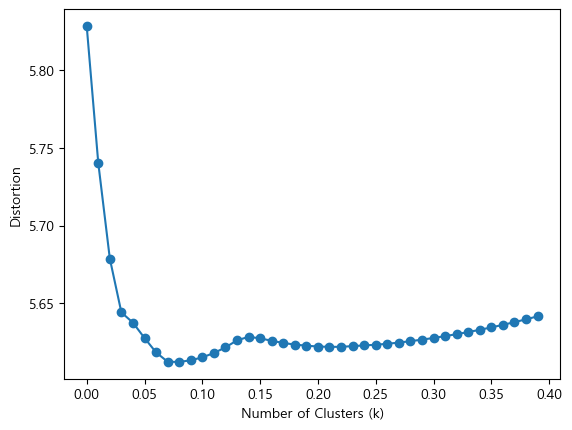

In [23]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.4, 0.01)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Lasso(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [24]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.08)
fit_model = model.fit(x,y)

In [25]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features      coeff
0   intercept  25.161569
1        CRIM  -0.098094
2          ZN   0.049110
3       INDUS  -0.040286
4        CHAS   1.274619
5         NOX  -0.000000
6          RM   3.760880
7         AGE  -0.011149
8         DIS  -1.171234
9         RAD   0.272197
10        TAX  -0.014384
11    PTRATIO  -0.766958
12          B   0.010249
13      LSTAT  -0.563211

 5 folds 의 개별 Negative MSE scores:  [-11.178 -24.363 -28.793 -80.113 -29.867]
 5 folds 의 개별 RMSE scores :  [3.343 4.936 5.366 8.951 5.465]
 5 folds 의 평균 RMSE : 5.612 



In [26]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7278
Adj. R-squared : 0.7206

F-statistic : 101.1894
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept       25.1616            5.228        4.813          0.000
1        CRIM       -0.0981            0.034       -2.913          0.004
2          ZN        0.0491            0.014        3.492          0.001
3       INDUS       -0.0403            0.063       -0.639          0.523
4        CHAS        1.2746            0.883        1.444          0.149
5         NOX       -0.0000            3.913       -0.000          1.000
6          RM        3.7609            0.428        8.784          0.000
7         AGE       -0.0111            0.014       -0.824          0.410
8         DIS       -1.1712            0.204       -5.732          0.000
9         RAD        0.2722            0.068        4.005          0.000
10        TAX       -0.0144            0.004       -3.734          0.000
11    PTRATIO       -0.7670    

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [27]:
x = df_house.iloc[:, 1:14].drop(['INDUS', 'CHAS', 'NOX', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.08)
fit_model = model.fit(x,y)

In [28]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

    features      coeff
0  intercept  24.937795
1       CRIM  -0.099012
2         ZN   0.051877
3         RM   3.740453
4        DIS  -1.080249
5        RAD   0.294230
6        TAX  -0.016198
7    PTRATIO  -0.787967
8          B   0.010411
9      LSTAT  -0.585857

 5 folds 의 개별 Negative MSE scores:  [-11.097 -23.668 -29.287 -73.235 -30.741]
 5 folds 의 개별 RMSE scores :  [3.331 4.865 5.412 8.558 5.544]
 5 folds 의 평균 RMSE : 5.542 



In [29]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7235
Adj. R-squared : 0.7185

F-statistic : 144.2415
p-value (of F-stat.) 0.0

     Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0  Intercept       24.9378            4.343        5.742          0.000
1       CRIM       -0.0990            0.034       -2.945          0.003
2         ZN        0.0519            0.014        3.745          0.000
3         RM        3.7405            0.417        8.961          0.000
4        DIS       -1.0802            0.167       -6.473          0.000
5        RAD        0.2942            0.065        4.527          0.000
6        TAX       -0.0162            0.003       -4.811          0.000
7    PTRATIO       -0.7880            0.126       -6.247          0.000
8          B        0.0104            0.003        3.793          0.000
9      LSTAT       -0.5859            0.048      -12.258          0.000



# Elastic Net 회귀

In [30]:
from patsy import dmatrices

# create dummy variables, and their interactions
y, x = dmatrices('MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', df_house, return_type="dataframe")

# flatten y into a 1-D array so scikit-learn can understand it
y = np.ravel(y)

In [31]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [32]:
x

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
